# ####Missing Values- Feature Engineering- Day 1

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?



#### 1.Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other

In [6]:
import seaborn as sns

In [11]:
df=sns.load_dataset('titanic')

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [23]:
df[(df['age'].isnull()) & (df['deck'].isnull()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


2.Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [34]:
import numpy as np
df['cabin_null']=np.where(df['deck'].isnull(),1,0)

In [36]:
df['cabin_null'].mean()

0.7721661054994389

In [56]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.877960
1    0.602339
Name: cabin_null, dtype: float64

In [70]:
df.groupby(['cabin_null']).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
cabin_null,,,,,,,,
0,0.669951,1.197044,35.779457,0.443350,0.438424,76.341708,0.487685,0.458128
1,0.299419,2.636628,27.588208,0.546512,0.364826,19.181079,0.636628,0.645349


In [108]:
import pandas as pd
N = 3000
sex = np.random.choice(["Male", "Female"], N, p=[0.6, 0.4])
height = 140 + (200-140) * np.random.rand(N)
weight = 40 + (120-40) * np.random.rand(N)
salary = 30000+(80000-30000) * np.random.rand(N)
df = pd.DataFrame(data=[sex, height, weight, salary]).T
df.columns = ["Sex", "Height", "weight", "salary"]


df["Dice"] = df["Sex"]
# Fill the Dice column with the probability values
df["Dice"] = np.random.choice([1, 2, 3, 4, 5, 6], N, p=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
# Dtermine indices where Dice=6
index = df[df["Dice"]==6].index
# Replace with NaN
df.loc[index,"Height"] = np.nan
df.head(20)

,Sex,Height,weight,salary,Dice
0,Male,167.95,94.709,33312.2,3
1,Male,191.259,88.5855,59013.5,2
2,Female,147.93,78.7241,59661,3
3,Male,159.421,51.1512,41539.4,1
4,Female,167.348,117.321,35672.7,2
5,Female,156.443,117.497,39065.4,1
6,Female,NaN,91.7023,57709.8,6
7,Male,182.638,56.0445,59705.1,1
8,Male,176.99,60.6776,33673.1,3
9,Female,178.621,52.492,42610.2,5


#### Missing At Random(MAR)
1.Men---hide their salary 
2.Women---hide their age

### All the techniques of handling ,missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### Mean/ Median/Mode replacement


When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 
We solve this by replacing the NAN with the most frequent occurance of the variables

In [ ]:
when sholud apply

In [125]:
df1=sns.load_dataset('titanic')
df2=df1[['survived','age','fare']]
df2.isnull().mean()


28.0

In [150]:
def function(dataframe,variable,median):
    dataframe[variable+'_median']=dataframe[variable].fillna(median)
    
    
    
function(df2,'age',df2['age'].median())
df2.head()

<ipython-input-150-446e4eca6ed4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[variable+'_median']=dataframe[variable].fillna(median)


,survived,age,fare,agemedian,age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [155]:
print(df2['age'].std())
print(df2['age_median'].std())

14.526497332334044
13.019696550973194


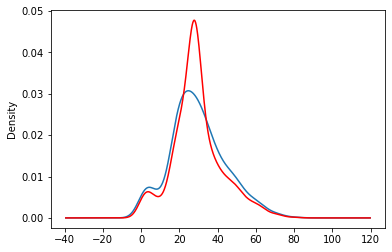

In [170]:
from matplotlib import pyplot as plt
def analizing(data1,data2):
    fig=plt.figure() 
    ax = fig.add_subplot(111) 
    data1.plot(kind='kde', ax=ax) 
    data2.plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.get_legend_handles_labels()
    
    

analizing(df2['age'],df2['age_median'])

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation